# Dealing with Outliers

In statistics, an outlier is a data point that differs significantly from other observations.An outlier may be due to variability in the measurement or it may indicate experimental error, the latter are sometimes excluded from the data set. An outlier can cause serious problems in statistical analyses.

Remember that even if a data point is an outlier, its still a data point! Carefully consider your data, its sources, and your goals whenver deciding to remove an outlier. Each case is different.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(42)
sample = np.random.normal(loc=50, scale=13, size=100)
sample = np.round(sample, decimals=0)
sample

array([56., 48., 58., 70., 47., 47., 71., 60., 44., 57., 44., 44., 53.,
       25., 28., 43., 37., 54., 38., 32., 69., 47., 51., 31., 43., 51.,
       35., 55., 42., 46., 42., 74., 50., 36., 61., 34., 53., 25., 33.,
       53., 60., 52., 48., 46., 31., 41., 44., 64., 54., 27., 54., 45.,
       41., 58., 63., 62., 39., 46., 54., 63., 44., 48., 36., 34., 61.,
       68., 49., 63., 55., 42., 55., 70., 50., 70., 16., 61., 51., 46.,
       51., 24., 47., 55., 69., 43., 39., 43., 62., 54., 43., 57., 51.,
       63., 41., 46., 45., 31., 54., 53., 50., 47.])

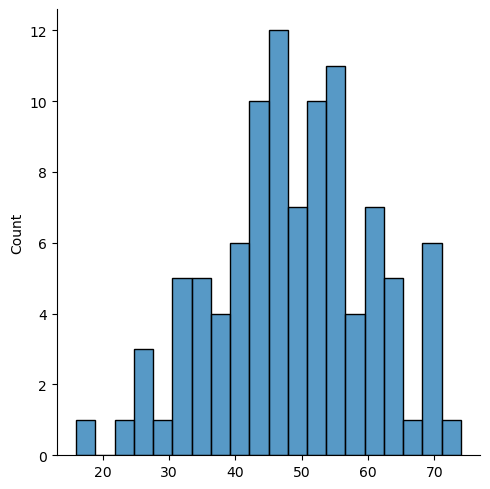

In [3]:
sns.displot(sample, bins=20, kde=False)

We can see the outlier we have which is below 20

<Axes: >

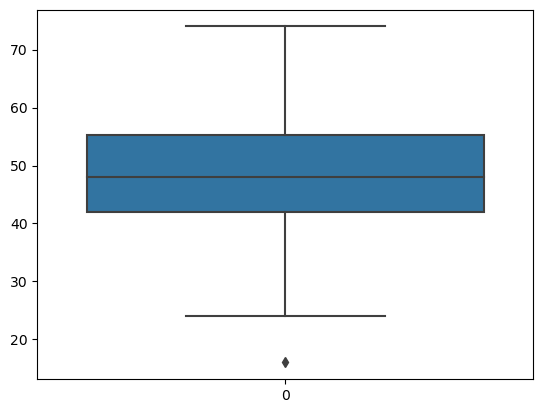

In [4]:
sns.boxplot(sample)

We have 100 items in our series so let's filter the outlier

In [5]:
my_series = pd.Series(sample)
my_series.describe()

count    100.00000
mean      48.66000
std       11.82039
min       16.00000
25%       42.00000
50%       48.00000
75%       55.25000
max       74.00000
dtype: float64

We will find the lower limit and use it as a filter to filter smaller values which is the outlier

In [6]:
IQR = 55.25 - 42 # the 75% and 25% values
lower_limit = 42 - 1.5 * (IQR)
lower_limit

22.125

We had 100 items and now 99 after we found and removed the outlier

In [7]:
len(my_series[my_series > lower_limit])

99

We could also use a scatterplot for some use cases to identify the outliers.